In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

!nvidia-smi

Wed Jul 10 23:52:37 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 520.61.05    Driver Version: 520.61.05    CUDA Version: 11.8     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0 Off |                  N/A |
| 32%   21C    P8    25W / 350W |   8033MiB / 24576MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  On   | 00000000:23:00.0 Off |                  N/A |
| 35%   

In [2]:
import torch
from diffusers import StableDiffusionPipeline, DDPMScheduler, DPMSolverSDEScheduler

pipe = StableDiffusionPipeline.from_single_file("/data/sd_files/checkpoint/beautifulRealistic_v7.safetensors",
                                                torch_dtype=torch.float16, use_safetensors=True, variant="fp16")

pipe.to("cuda")
pipe.scheduler = DPMSolverSDEScheduler.from_config(pipe.scheduler.config)

print('done')

2024-07-10 23:52:42.870519: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-10 23:52:43.603219: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/gaudio/anaconda3/envs/ste/lib/python3.8/site-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/home/gaudio/anaconda3/envs/ste/lib/python3.8/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


done


/home/gaudio/anaconda3/envs/ste/lib/python3.8/site-packages/diffusers/configuration_utils.py:139: FutureWarning: Accessing config attribute `use_karras_sigmas` directly via 'DPMSolverSDEScheduler' object attribute is deprecated. Please access 'use_karras_sigmas' over 'DPMSolverSDEScheduler's config object instead, e.g. 'scheduler.config.use_karras_sigmas'.
  deprecate("direct config name access", "1.0.0", deprecation_message, standard_warn=False)


In [4]:
'''
unique identifier가 없는 prompt들 by ChatGPT

아래 문장들을 paraphrase해서 100개 다양한 문장 만들어줘 
'a yellow and white stuffed hark with a big smile',
'a cartoon shark with a big smile',
'a cartoon shark with numbers and fish',
'a cartoon shark with big eyes and a smile',
'''
    
prompts = [
 'a shark fish with numbers and cartoon',
 'a with smile and big cartoon eyes a shark',
 'a smile shark yellow white a with big stuffed and',
 'cartoon shark a smile with big a',
 'with shark smile cartoon a big a',
 'cartoon a smile a and eyes shark big with',
 'big smile with cartoon eyes a shark and a',
 'a and a shark yellow smile big with stuffed white',
 'a and cartoon big with eyes smile a shark',
 'shark and with smile a cartoon eyes a big',
 'a white big smile stuffed yellow and shark a with',
 'smile a stuffed yellow a with and shark white big',
 'with cartoon shark big a smile a',
 'cartoon shark big with a a smile',
 'shark a fish cartoon numbers with and',
 'smile cartoon and eyes with big a shark a',
 'fish with and shark a numbers cartoon',
 'cartoon a eyes shark and big with smile a',
 'stuffed shark yellow a with and smile big white a',
 'a shark with cartoon big smile a',
 'big with smile a shark a cartoon',
 'with a smile shark a eyes big and cartoon',
 'shark white a with stuffed and big yellow smile a',
 'stuffed big smile and with a white yellow a shark',
 'cartoon and with a shark numbers fish',
 'shark fish numbers and a cartoon with',
 'with shark white a and smile stuffed yellow a big',
 'numbers a shark and with cartoon fish',
 'big shark a smile cartoon eyes and a with',
 'big shark cartoon a smile with a',
 'and with shark cartoon a fish numbers',
 'yellow a and white a with big smile shark stuffed',
 'smile yellow with and a stuffed a big white shark',
 'a shark a smile with big stuffed yellow white and',
 'a yellow a big with smile white stuffed shark and',
 'numbers cartoon shark with and fish a',
 'a a shark big with smile cartoon',
 'white big a and yellow a stuffed shark smile with',
 'big smile a shark with cartoon a',
 'shark and eyes with a big a smile cartoon',
 'big with smile cartoon a a shark',
 'cartoon a shark with a smile big',
 'smile a shark cartoon with a big',
 'and shark fish a numbers cartoon with',
 'big a smile shark with cartoon a',
 'yellow shark with a big stuffed smile white and',
 'big cartoon with smile and shark eyes a a',
 'big eyes cartoon smile shark a with a and',
 'eyes a with shark and cartoon big smile a',
 'with cartoon a a shark big smile',
 'smile a with shark big a cartoon',
 'fish numbers and shark cartoon a with',
 'and a numbers with shark fish cartoon',
 'smile a yellow big shark white stuffed a and with',
 'big and with a stuffed shark smile a white yellow',
 'smile shark and a cartoon with eyes a big',
 'a cartoon big smile with shark a',
 'with big cartoon a and smile eyes shark a',
 'numbers a cartoon and fish shark with',
 'shark cartoon and a with numbers fish',
 'a white a with yellow smile stuffed and shark big',
 'and numbers fish shark a cartoon with',
 'a with a big yellow smile stuffed white shark and',
 'and a white shark smile stuffed big a with yellow',
 'fish numbers and a shark cartoon with',
 'a shark cartoon big smile with a',
 'yellow white big stuffed a with and a shark smile',
 'and numbers fish shark with a cartoon',
 'cartoon big a a smile shark with',
 'smile shark with a and eyes cartoon big a',
 'with shark and a big white a stuffed smile yellow',
 'a with cartoon and shark fish numbers',
 'shark smile with cartoon a a big',
 'a yellow big and white stuffed shark with a smile',
 'big shark white a yellow a smile stuffed and with',
 'a with cartoon smile shark big a',
 'and cartoon shark a with a big eyes smile',
 'big cartoon smile a and with a shark eyes',
 'cartoon smile with a a big shark',
 'smile shark a cartoon a with big',
 'a and with smile big a shark eyes cartoon',
 'a fish cartoon shark and numbers with',
 'with shark fish a numbers cartoon and',
 'cartoon smile shark big and with a eyes a',
 'and cartoon a with fish numbers shark',
 'fish a and numbers shark with cartoon',
 'cartoon with big shark smile and a eyes a',
 'a shark a big with cartoon smile',
 'and numbers fish a shark with cartoon',
 'big yellow a white smile and stuffed with shark a',
 'with shark big cartoon smile a and a eyes',
 'with cartoon big a smile shark a',
 'and smile big shark a cartoon eyes with a'
]


In [7]:
import os
save_dir = '/data/sd_dataset/shark_prior'
os.makedirs(save_dir, exist_ok=True)

from tqdm import tqdm
import numpy as np

for i in tqdm(range(100)):
    prompt = prompts[np.random.randint(0, len(prompts))]
    image = pipe(prompt=prompt,
                 height=512,
                 width=512,
                 num_inference_steps=20,
                 guidance_scale=7,
                ).images[0]
    image.save(os.path.join(save_dir, str(i) + '.png'))
    
    with open(os.path.join(save_dir, str(i) + '.txt'), 'w') as f:
        f.write(prompt)


  0%|                                                                             | 0/500 [00:00<?, ?it/s]

/home/gaudio/anaconda3/envs/ste/lib/python3.8/site-packages/torchsde/_brownian/brownian_interval.py:599: UserWarning: Should have ta>=t0 but got ta=0.0291675366461277 and t0=0.029168.
  warnings.warn(f"Should have ta>=t0 but got ta={ta} and t0={self._start}.")


  0%|▏                                                                    | 1/500 [00:03<30:43,  3.69s/it]

  0%|▎                                                                    | 2/500 [00:05<26:54,  3.24s/it]

  1%|▍                                                                    | 3/500 [00:08<24:17,  2.93s/it]

  1%|▌                                                                    | 4/500 [00:10<22:25,  2.71s/it]

  1%|▋                                                                    | 5/500 [00:12<21:07,  2.56s/it]

  1%|▊                                                                    | 6/500 [00:14<20:10,  2.45s/it]

  1%|▉                                                                    | 7/500 [00:16<19:31,  2.38s/it]

  2%|█                                                                    | 8/500 [00:19<19:06,  2.33s/it]

  2%|█▏                                                                   | 9/500 [00:21<18:40,  2.28s/it]

  2%|█▎                                                                  | 10/500 [00:23<18:25,  2.26s/it]

  2%|█▍                                                                  | 11/500 [00:25<18:08,  2.23s/it]

  2%|█▋                                                                  | 12/500 [00:27<18:02,  2.22s/it]

  3%|█▊                                                                  | 13/500 [00:30<17:54,  2.21s/it]

  3%|█▉                                                                  | 14/500 [00:32<17:46,  2.19s/it]

  3%|██                                                                  | 15/500 [00:34<17:42,  2.19s/it]

  3%|██▏                                                                 | 16/500 [00:36<17:45,  2.20s/it]

  3%|██▎                                                                 | 17/500 [00:38<17:48,  2.21s/it]

  4%|██▍                                                                 | 18/500 [00:41<17:43,  2.21s/it]

  4%|██▌                                                                 | 19/500 [00:43<17:40,  2.21s/it]

  4%|██▋                                                                 | 20/500 [00:45<17:42,  2.21s/it]

  4%|██▊                                                                 | 21/500 [00:47<17:41,  2.22s/it]

  4%|██▉                                                                 | 22/500 [00:49<17:40,  2.22s/it]

  5%|███▏                                                                | 23/500 [00:52<17:32,  2.21s/it]

  5%|███▎                                                                | 24/500 [00:54<17:26,  2.20s/it]

  5%|███▍                                                                | 25/500 [00:56<17:23,  2.20s/it]

  5%|███▌                                                                | 26/500 [00:58<17:21,  2.20s/it]

  5%|███▋                                                                | 27/500 [01:00<17:14,  2.19s/it]

  6%|███▊                                                                | 28/500 [01:03<17:14,  2.19s/it]

  6%|███▉                                                                | 29/500 [01:05<17:14,  2.20s/it]

  6%|████                                                                | 30/500 [01:07<17:13,  2.20s/it]

  6%|████▏                                                               | 31/500 [01:09<17:17,  2.21s/it]

  6%|████▎                                                               | 32/500 [01:11<17:13,  2.21s/it]

  7%|████▍                                                               | 33/500 [01:14<17:09,  2.20s/it]

  7%|████▌                                                               | 34/500 [01:16<17:07,  2.20s/it]

  7%|████▊                                                               | 35/500 [01:18<17:11,  2.22s/it]

  7%|████▉                                                               | 36/500 [01:20<17:12,  2.22s/it]

  7%|█████                                                               | 37/500 [01:22<17:03,  2.21s/it]

  8%|█████▏                                                              | 38/500 [01:25<16:58,  2.20s/it]

  8%|█████▎                                                              | 39/500 [01:27<16:59,  2.21s/it]

  8%|█████▍                                                              | 40/500 [01:29<16:57,  2.21s/it]

  8%|█████▌                                                              | 41/500 [01:31<16:54,  2.21s/it]

  8%|█████▋                                                              | 42/500 [01:34<16:54,  2.21s/it]

  9%|█████▊                                                              | 43/500 [01:36<16:52,  2.21s/it]

  9%|█████▉                                                              | 44/500 [01:38<16:49,  2.21s/it]

  9%|██████                                                              | 45/500 [01:40<16:49,  2.22s/it]

  9%|██████▎                                                             | 46/500 [01:42<16:45,  2.21s/it]

  9%|██████▍                                                             | 47/500 [01:45<16:41,  2.21s/it]

 10%|██████▌                                                             | 48/500 [01:47<16:41,  2.22s/it]

 10%|██████▋                                                             | 49/500 [01:49<16:46,  2.23s/it]

 10%|██████▊                                                             | 50/500 [01:51<16:46,  2.24s/it]

 10%|██████▉                                                             | 51/500 [01:54<16:38,  2.22s/it]

 10%|███████                                                             | 52/500 [01:56<16:35,  2.22s/it]

 11%|███████▏                                                            | 53/500 [01:58<16:33,  2.22s/it]

 11%|███████▎                                                            | 54/500 [02:00<16:28,  2.22s/it]

 11%|███████▍                                                            | 55/500 [02:02<16:29,  2.22s/it]

 11%|███████▌                                                            | 56/500 [02:05<16:30,  2.23s/it]

 11%|███████▊                                                            | 57/500 [02:07<16:31,  2.24s/it]

 12%|███████▉                                                            | 58/500 [02:09<16:27,  2.23s/it]

 12%|████████                                                            | 59/500 [02:11<16:24,  2.23s/it]

 12%|████████▏                                                           | 60/500 [02:14<16:24,  2.24s/it]

 12%|████████▎                                                           | 61/500 [02:16<16:23,  2.24s/it]

 12%|████████▍                                                           | 62/500 [02:18<16:15,  2.23s/it]

 13%|████████▌                                                           | 63/500 [02:20<16:17,  2.24s/it]

 13%|████████▋                                                           | 64/500 [02:23<16:12,  2.23s/it]

 13%|████████▊                                                           | 65/500 [02:25<16:12,  2.24s/it]

 13%|████████▉                                                           | 66/500 [02:27<16:09,  2.23s/it]

 13%|█████████                                                           | 67/500 [02:29<16:05,  2.23s/it]

 14%|█████████▏                                                          | 68/500 [02:31<16:04,  2.23s/it]

 14%|█████████▍                                                          | 69/500 [02:34<16:06,  2.24s/it]

 14%|█████████▌                                                          | 70/500 [02:36<16:07,  2.25s/it]

 14%|█████████▋                                                          | 71/500 [02:38<16:09,  2.26s/it]

 14%|█████████▊                                                          | 72/500 [02:40<16:03,  2.25s/it]

 15%|█████████▉                                                          | 73/500 [02:43<16:00,  2.25s/it]

 15%|██████████                                                          | 74/500 [02:45<15:56,  2.24s/it]

 15%|██████████▏                                                         | 75/500 [02:47<15:56,  2.25s/it]

 15%|██████████▎                                                         | 76/500 [02:50<15:55,  2.25s/it]

 15%|██████████▍                                                         | 77/500 [02:52<15:50,  2.25s/it]

 16%|██████████▌                                                         | 78/500 [02:54<15:51,  2.26s/it]

 16%|██████████▋                                                         | 79/500 [02:56<15:47,  2.25s/it]

 16%|██████████▉                                                         | 80/500 [02:58<15:42,  2.24s/it]

 16%|███████████                                                         | 81/500 [03:01<15:38,  2.24s/it]

 16%|███████████▏                                                        | 82/500 [03:03<15:36,  2.24s/it]

 17%|███████████▎                                                        | 83/500 [03:05<15:35,  2.24s/it]

 17%|███████████▍                                                        | 84/500 [03:07<15:31,  2.24s/it]

 17%|███████████▌                                                        | 85/500 [03:10<15:33,  2.25s/it]

 17%|███████████▋                                                        | 86/500 [03:12<15:28,  2.24s/it]

 17%|███████████▊                                                        | 87/500 [03:14<15:24,  2.24s/it]

 18%|███████████▉                                                        | 88/500 [03:16<15:23,  2.24s/it]

 18%|████████████                                                        | 89/500 [03:19<15:25,  2.25s/it]

 18%|████████████▏                                                       | 90/500 [03:21<15:23,  2.25s/it]

 18%|████████████▍                                                       | 91/500 [03:23<15:20,  2.25s/it]

 18%|████████████▌                                                       | 92/500 [03:25<15:20,  2.26s/it]

 19%|████████████▋                                                       | 93/500 [03:28<15:15,  2.25s/it]

 19%|████████████▊                                                       | 94/500 [03:30<15:14,  2.25s/it]

 19%|████████████▉                                                       | 95/500 [03:32<15:14,  2.26s/it]

 19%|█████████████                                                       | 96/500 [03:34<15:08,  2.25s/it]

 19%|█████████████▏                                                      | 97/500 [03:37<15:06,  2.25s/it]

 20%|█████████████▎                                                      | 98/500 [03:39<15:05,  2.25s/it]

 20%|█████████████▍                                                      | 99/500 [03:41<15:04,  2.26s/it]

 20%|█████████████▍                                                     | 100/500 [03:43<15:02,  2.26s/it]

 20%|█████████████▌                                                     | 101/500 [03:46<15:02,  2.26s/it]

 20%|█████████████▋                                                     | 102/500 [03:48<15:00,  2.26s/it]

 21%|█████████████▊                                                     | 103/500 [03:50<14:54,  2.25s/it]

 21%|█████████████▉                                                     | 104/500 [03:52<14:49,  2.25s/it]

 21%|█████████████▉                                                     | 104/500 [03:53<14:49,  2.25s/it]
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.




Traceback (most recent call last):
  File "/home/gaudio/anaconda3/envs/ste/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_1316424/1483386854.py", line 10, in <module>
    image = pipe(prompt=prompt,
  File "/home/gaudio/anaconda3/envs/ste/lib/python3.8/site-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/home/gaudio/anaconda3/envs/ste/lib/python3.8/site-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py", line 1022, in __call__
    latents = self.scheduler.step(noise_pred, t, latents, **extra_step_kwargs, return_dict=False)[0]
  File "/home/gaudio/anaconda3/envs/ste/lib/python3.8/site-packages/diffusers/schedulers/scheduling_dpmsolver_sde.py", line 448, in step
    timestep_int = timestep.cpu().item() if torch.is_tensor(timestep) else timestep
KeyboardInterrupt

During handling of the a

TypeError: object of type 'NoneType' has no len()

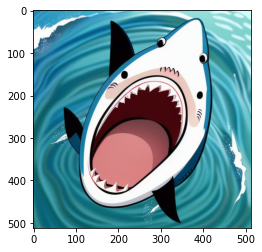

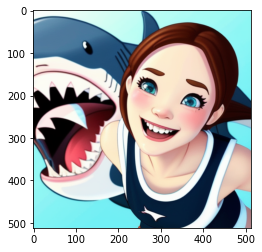

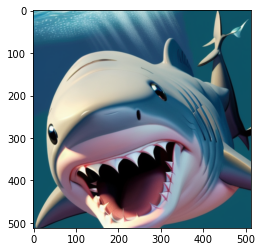

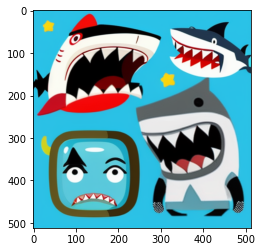

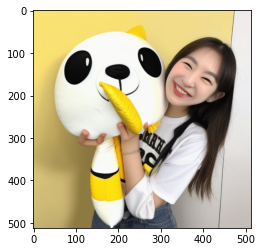

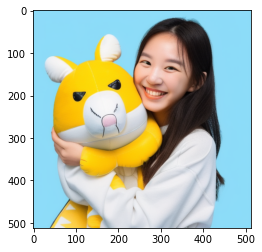

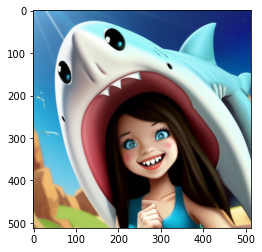

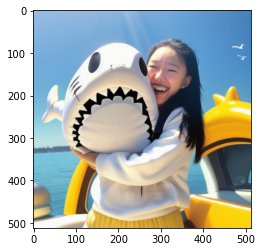

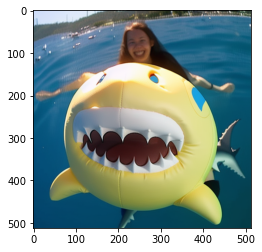

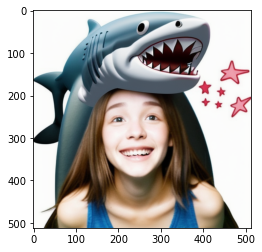

In [3]:
import matplotlib.pyplot as plt

import os
import numpy as np
from tqdm import tqdm

def find_png_files(directory):
    png_files = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.png'):
                full_path = os.path.join(root, file)
                png_files.append(full_path)
    return png_files

# Example usage
directory = '/data/sd_dataset/shark_prior'  # Assuming the user wants to search this directory
png_files = find_png_files(directory)
np.random.shuffle(png_files)
len(png_files)

for png_file in png_files[:10]:
    
    plt.imshow(plt.imread(png_file))
    plt.show()
